# Locality Preserving Projections in Python

``lpproj`` is a Python implementation of Locality Preserving Projections, built to be compatible with scikit-learn. It can be installed with pip; e.g.

```
pip install lpproj
```

For more information, see http://github.com/jakevdp/lpproj

This notebook contains a very short example showing the use of the code.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## The Data

We'll use scikit-learn and create some data consisting of blobs in 300 dimensions:

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=4,
                  cluster_std=8, random_state=42)

## Random Projections

If we select a few random two-dimensional projections, we can see that the clusters overlap significantly along any particular "line-of-sight" into the high-dimensional data:

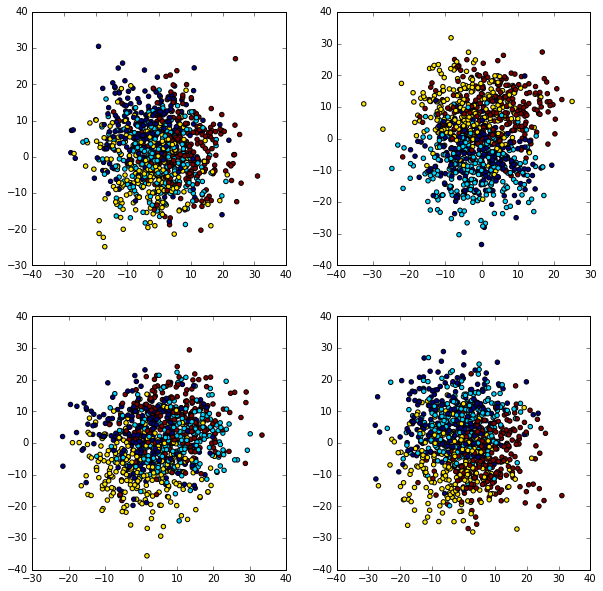

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
rand = np.random.RandomState(42)

for axi in ax.flat:
    i, j = rand.randint(X.shape[1], size=2)
    axi.scatter(X[:, i], X[:, j], c=y)

## Locality Preserving Projection

We can find a projection that preserves the locality of the points using the ``LocalityPreservingProjection`` estimator; here we'll project the data into two dimensions:

In [4]:
from lpproj import LocalityPreservingProjection
lpp = LocalityPreservingProjection(n_components=2)

X_2D = lpp.fit_transform(X)

Plotting this projection, we confirm that it has kept nearby points together, as represented by the distinct clusters visible in the projection:

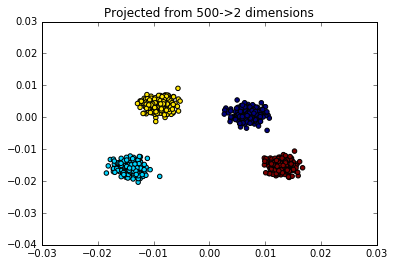

In [5]:
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y)

plt.title("Projected from 500->2 dimensions");

For more information, see the [Locality Preserving Projection website](http://www.cad.zju.edu.cn/home/xiaofeihe/LPP.html)

## Comparison with PCA

Of course, there are well-known tools that can do very similar things: for example, a standard Principal Component Analysis projection produces much the same results in this case:

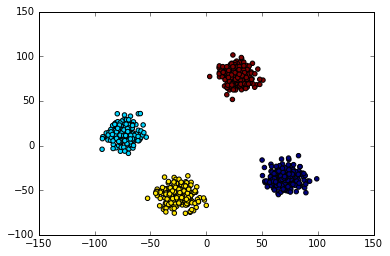

In [6]:
from sklearn.decomposition import PCA
Xpca = PCA(n_components=2).fit_transform(X)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=y);

It is important to keep in mind, though, that these are two fundamentally different models: PCA finds a linear projection which *maximizes the preserved variance* in the data. LPP finds a linear projection which *maximizes the preserved locality* in the data.

## Where PCA and LPP Differ

The difference between the two can be made more clear by looking at data with different properties.
One example is data with outliers.
Because PCA is a variance-based method, it is strongly affected by the presence of outliers.
LPP, on the other hand, focuses on preserving local neighborhoods and thus outliers do not have as strong an effect.

First we'll add ten outliers to our original data:

In [7]:
rand = np.random.RandomState(42)
Xnoisy = X.copy()
Xnoisy[:10] += 1000 * rand.randn(10, X.shape[1])

Now we can compute the PCA and LPP projections and view the results:

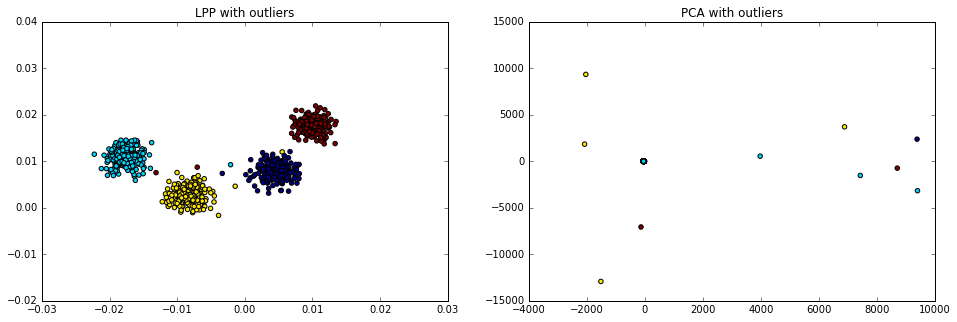

In [8]:
Xpca = PCA(n_components=2).fit_transform(Xnoisy)
Xlpp = LocalityPreservingProjection(n_components=2).fit_transform(Xnoisy)

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax[0].scatter(Xlpp[:, 0], Xlpp[:, 1], c=y)
ax[0].set_title('LPP with outliers')
ax[1].scatter(Xpca[:, 0], Xpca[:, 1], c=y)
ax[1].set_title('PCA with outliers');

In the presence of outliers, the projection found by LPP is much more useful than the projection found by PCA.